In [1]:
import os
import re
import numpy as np
import pandas as pd

In [2]:
train_test_path = os.path.dirname(os.path.abspath(""))
os.listdir(train_test_path)

['ML', 'test.csv', 'train.csv']

In [3]:
train_csv_parh = os.path.join(train_test_path, "train.csv")
test_csv_parh = os.path.join(train_test_path, "test.csv")

In [4]:
df = pd.read_csv(train_csv_parh)
df = df.set_index("PassengerId") # set this col as index
df_test = pd.read_csv(test_csv_parh)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [5]:
# most missing values on Cabin column which is categorical type of data (better to drop it)
# missing values on age column will be restored by median/mean preprocessing
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

### feature engineering
* add new col FamilySize that is sum of SibSp and Parch
* drop numerical values from Cabin col
* extract titles from Name col
* imputate missing data on Age col

In [7]:
# FamilySize
df["FamilySize"] = df["SibSp"] + df["Parch"]
#drop SibSp and Parch cols
df = df.drop(columns=["SibSp", "Parch"])
df

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,S,3


In [8]:
# observation of Cabin column
cabins = df["Cabin"].dropna()
cabins.head(10)

PassengerId
2             C85
4            C123
7             E46
11             G6
12           C103
22            D56
24             A6
28    C23 C25 C27
32            B78
53            D33
Name: Cabin, dtype: object

In [9]:
# dropping numerical data from Cabin col
pattern = re.compile(r'[a-zA-Z]+')
df_iter_copy = df.copy()
for n,i in enumerate(df_iter_copy["Cabin"], start=1):
    matches = []
    if type(i) == str:
        i = "".join(i.split(" ")).strip()
        matches = pattern.findall(i)
        matches = list(set(matches))[0] # remove duplicates
        if len(matches) > 1:
            matches = "Not Sure"
        df.loc[n, "Cabin"] = matches
#         print(df["Cabin"].iloc[n])
    continue
df["Cabin"]

PassengerId
1      NaN
2        C
3      NaN
4        C
5      NaN
      ... 
887    NaN
888      B
889    NaN
890      C
891    NaN
Name: Cabin, Length: 891, dtype: object

In [10]:
#* fill NaN by new category "Not Sure"
df["Cabin"] = df["Cabin"].fillna("Not Sure")
df["Cabin"]

PassengerId
1      Not Sure
2             C
3      Not Sure
4             C
5      Not Sure
         ...   
887    Not Sure
888           B
889    Not Sure
890           C
891    Not Sure
Name: Cabin, Length: 891, dtype: object

In [11]:
df.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           177
Ticket          0
Fare            0
Cabin           0
Embarked        2
FamilySize      0
dtype: int64

In [12]:
# extract titles from Name col
all_titles = ["Dr." , "Mr.", "Mrs.", "Ms.", "Miss.", 
              "Master.", "Rev.", "Mlle.", "Major."]
positions, titles = [], []
for n, i in enumerate(df["Name"].str.split(), start=1):
        for title in all_titles:
            if title in i:
                positions.append(n)
                titles.append(title)

In [13]:
df["Name"].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [14]:
# create new col and populate by positons and titles
df.loc[positions, "Title"] = titles
df["Title"]

PassengerId
1        Mr.
2       Mrs.
3      Miss.
4       Mrs.
5        Mr.
       ...  
887     Rev.
888    Miss.
889    Miss.
890      Mr.
891      Mr.
Name: Title, Length: 891, dtype: object

In [15]:
# drop rows in which title is not included in all_titles list
df = df[df["Title"].isin(all_titles) == True]

In [16]:
df

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize,Title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,Not Sure,S,1,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,C,1,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,Not Sure,S,0,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C,S,1,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,Not Sure,S,0,Mr.
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,Not Sure,S,0,Rev.
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B,S,0,Miss.
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,Not Sure,S,3,Miss.


In [17]:
# Imputation of Age missing values
from sklearn.impute import SimpleImputer
age_array = df["Age"].to_numpy()
median_imputer = SimpleImputer(strategy="median")
median_imputer.fit(age_array.reshape(-1,1))
median_imputer.statistics_

array([28.])

In [18]:
# Imputation of Age missing values
age_median_imputed = median_imputer.transform(df["Age"].to_numpy().reshape(-1,1))
age_median_imputed.reshape(-1)
print(df["Age"].shape, age_median_imputed.shape)

# df.isnull().sum()

(882,) (882, 1)


In [19]:
df.loc[:, "Age"] = age_median_imputed
# isnull test
df.isnull().sum()

/tmp/ipykernel_864/946993249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Age"] = age_median_imputed


Survived      0
Pclass        0
Name          0
Sex           0
Age           0
Ticket        0
Fare          0
Cabin         0
Embarked      2
FamilySize    0
Title         0
dtype: int64

In [20]:
# drop rows with unknown Embarked value
df = df.dropna()
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
Ticket        0
Fare          0
Cabin         0
Embarked      0
FamilySize    0
Title         0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 1 to 891
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    880 non-null    int64  
 1   Pclass      880 non-null    int64  
 2   Name        880 non-null    object 
 3   Sex         880 non-null    object 
 4   Age         880 non-null    float64
 5   Ticket      880 non-null    object 
 6   Fare        880 non-null    float64
 7   Cabin       880 non-null    object 
 8   Embarked    880 non-null    object 
 9   FamilySize  880 non-null    int64  
 10  Title       880 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 82.5+ KB


In [22]:
# drop Name and Ticket columns
df = df.drop(columns="Name")
df = df.drop(columns="Ticket")

In [23]:
# reset index_column because some rows where dropped
df = df.reset_index(drop=True)
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,male,22.0,7.2500,Not Sure,S,1,Mr.
1,1,1,female,38.0,71.2833,C,C,1,Mrs.
2,1,3,female,26.0,7.9250,Not Sure,S,0,Miss.
3,1,1,female,35.0,53.1000,C,S,1,Mrs.
4,0,3,male,35.0,8.0500,Not Sure,S,0,Mr.
...,...,...,...,...,...,...,...,...,...
875,0,2,male,27.0,13.0000,Not Sure,S,0,Rev.
876,1,1,female,19.0,30.0000,B,S,0,Miss.
877,0,3,female,28.0,23.4500,Not Sure,S,3,Miss.
878,1,1,male,26.0,30.0000,C,C,0,Mr.


### Data transformation
* better use ColumnTransformer for df object
* normalize numerical columns (StandartScalar)
* encode string categorical data (OneHotEncoder)
* encode string categorical data (LabelEncoding) when ranking makes a sense

#### categorical data ["Sex", "Ticket",  "Embarked", "FamilySize", "Title"]
#### numerical data ["Age", "Fare" ]
#### ranking data ["Cabin"]

In [24]:
# "Pclass" doesn't require any preprocessing
# "FamilySize" also can be considerd as ranking like column
categorical_cols = ["Sex", "Embarked", "FamilySize", "Title"]
numerical_cols = ["Age", "Fare"]
ranking_cols = ["Cabin"]
without_preprocessing = set(df.columns).difference(set([*categorical_cols, *numerical_cols, *ranking_cols]))
without_preprocessing

{'Pclass', 'Survived'}

In [25]:
# define classes to preprocess numerical and categorical data
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
scalar_encoder = StandardScaler()
oh_encoder = OneHotEncoder()
# encode into ranking like style (just a try cuz it may be a reason of label trap)
ordinal_encoder = OrdinalEncoder()

In [26]:
def create_transformer(dtype, cols):
    if dtype == "cat":
        encoder = oh_encoder
    elif dtype == "num":
        encoder = scalar_encoder
    elif dtype == "rank":
        encoder = ordinal_encoder
    return (dtype, encoder, cols)

In [27]:
categorical = create_transformer("cat", categorical_cols)
numerical = create_transformer("num", numerical_cols)
# cannot be used within Column transformer cuz fit/transform methods accept 2 argumets but other accepts 3
ranking = create_transformer("rank", ranking_cols) 

In [28]:
# apply one hot and scalar transormers on some columns
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([categorical, numerical, ranking])
ct

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 ['Sex', 'Embarked', 'FamilySize', 'Title']),
                                ('num', StandardScaler(), ['Age', 'Fare']),
                                ('rank', OrdinalEncoder(), ['Cabin'])])

In [29]:
# apply transorm method on early prepared ColumnTransformer
columns_prepared = ct.fit_transform(df)
ct.get_feature_names_out()

array(['cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S', 'cat__FamilySize_0',
       'cat__FamilySize_1', 'cat__FamilySize_2', 'cat__FamilySize_3',
       'cat__FamilySize_4', 'cat__FamilySize_5', 'cat__FamilySize_6',
       'cat__FamilySize_7', 'cat__FamilySize_10', 'cat__Title_Dr.',
       'cat__Title_Major.', 'cat__Title_Master.', 'cat__Title_Miss.',
       'cat__Title_Mlle.', 'cat__Title_Mr.', 'cat__Title_Mrs.',
       'cat__Title_Ms.', 'cat__Title_Rev.', 'num__Age', 'num__Fare',
       'rank__Cabin'], dtype=object)

In [30]:
df_processed = pd.DataFrame(columns_prepared.toarray(), columns=ct.get_feature_names_out())
df_processed = df_processed.set_index(np.arange(0,len(df_processed),1))
df_processed

,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__FamilySize_0,cat__FamilySize_1,cat__FamilySize_2,cat__FamilySize_3,cat__FamilySize_4,...,cat__Title_Master.,cat__Title_Miss.,cat__Title_Mlle.,cat__Title_Mr.,cat__Title_Mrs.,cat__Title_Ms.,cat__Title_Rev.,num__Age,num__Fare,rank__Cabin
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.555424,-0.495738,7.0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.689230,0.789146,2.0
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.244261,-0.482193,7.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.455857,0.424283,2.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.455857,-0.479685,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.166470,-0.380359,7.0
876,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.788797,-0.039239,1.0
877,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.088679,-0.170670,7.0
878,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.244261,-0.039239,2.0


In [31]:
# check shapes before train model
df_processed.shape, df["Survived"].shape, df["Pclass"].shape

((880, 26), (880,), (880,))

In [32]:
# add last columns to prepared dataset
df_processed["Pclass"] = df["Pclass"]
df_processed["Survived"] = df["Survived"]
df_processed

,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__FamilySize_0,cat__FamilySize_1,cat__FamilySize_2,cat__FamilySize_3,cat__FamilySize_4,...,cat__Title_Mlle.,cat__Title_Mr.,cat__Title_Mrs.,cat__Title_Ms.,cat__Title_Rev.,num__Age,num__Fare,rank__Cabin,Pclass,Survived
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.555424,-0.495738,7.0,3,0
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.689230,0.789146,2.0,1,1
2,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.244261,-0.482193,7.0,3,1
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.455857,0.424283,2.0,1,1
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.455857,-0.479685,7.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-0.166470,-0.380359,7.0,2,0
876,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.788797,-0.039239,1.0,1,1
877,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.088679,-0.170670,7.0,3,0
878,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,-0.244261,-0.039239,2.0,1,1


In [33]:
# one more missing values check
df_processed["Survived"].isnull().sum()

0

## Model training
### We have a binary classification problem so few models also can be compared

In [34]:
X, y = df_processed.drop("Survived", axis=1), df_processed["Survived"].copy()

In [35]:
# prepare train&test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [37]:
def models_train_test(names, clss):
    scores_train = []
    scores_test = []
    for cls in clss:
        cls.fit(X_train, y_train)
        score_train = cls.score(X_train, y_train)
        score_test = cls.score(X_test, y_test)
        scores_train.append(score_train)
        scores_test.append(score_test)
    return scores_train, scores_test

In [38]:
scores_train, scores_test = models_train_test(names, classifiers)

/home/mrzlka/.pyenv/versions/3.10.0/envs/dl-3.10.0/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [39]:
for train, test in zip(scores_train, scores_test):
    print(train, test)

0.875 0.8181818181818182
0.7769886363636364 0.8238636363636364
0.9090909090909091 0.8181818181818182
0.8480113636363636 0.8579545454545454
0.8607954545454546 0.8181818181818182
0.8252840909090909 0.8125
0.8551136363636364 0.8295454545454546
0.8451704545454546 0.8295454545454546
0.6960227272727273 0.6818181818181818
0.7784090909090909 0.8068181818181818


In [40]:
# the highets accuracy
best_accuracy = np.argmax(scores_test)
#the lowest accuracy
worst_accuracy = np.argmin(scores_test)
names[best_accuracy], names[worst_accuracy]

('Gaussian Process', 'Naive Bayes')

### Visualize results to find the weakness of models
* plot confusion matrix to check presion/recall
* plot target column distribution to check under/oversampling

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

<AxesSubplot: >

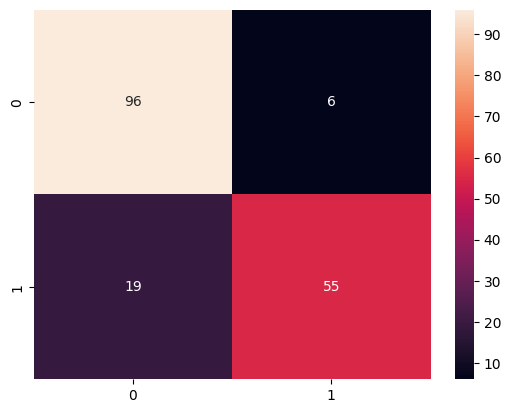

In [42]:
# confusion matrix for model with highest accuracy
sns.heatmap(confusion_matrix(y_test, classifiers[best_accuracy].predict(X_test)), annot=True, fmt='.0f')

<AxesSubplot: >

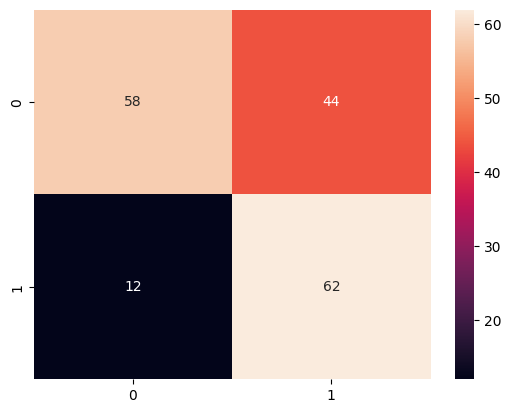

In [43]:
# confusion matrix for model with lowest accuracy
sns.heatmap(confusion_matrix(y_test, classifiers[worst_accuracy].predict(X_test)), annot=True, fmt='.0f')

portion of survived members 0.3806818181818182


(571, 309)

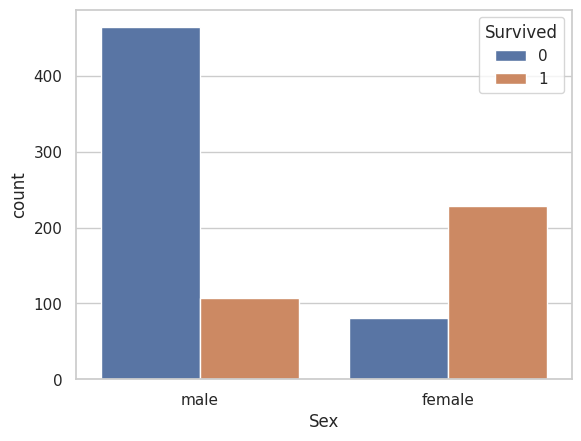

In [44]:
# set theme
sns.set_theme(style="whitegrid")
# lets check how many women and men survided/died
sns.countplot(data=df, x="Sex", hue="Survived")
#slightly inbalanced but not that much
print("portion of survived members", len(df["Survived"][df["Survived"]==1])/len(df["Survived"]))
# amount of (men, women)
len(df_processed["Survived"][df_processed["cat__Sex_male"]==1]), len(df_processed["Survived"][df_processed["cat__Sex_female"]==1])

<AxesSubplot: xlabel='Title', ylabel='count'>

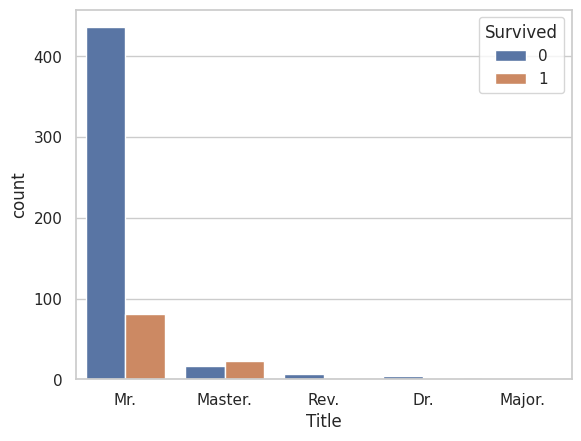

In [45]:
# also interesing to check dependencies title vs survived for men
sns.countplot(data=df[df["Sex"] == "male"], x="Title", hue="Survived")
# for masters there are more survived counts rather than died 

<AxesSubplot: xlabel='Cabin', ylabel='count'>

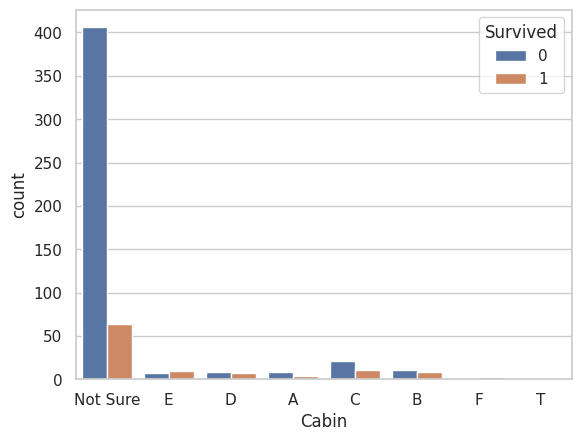

In [50]:
# Surviving dependensies from Cabin column for men
sns.countplot(data=df[df["Sex"] == "male"], x="Cabin", hue="Survived")
#It's clear that almost every person which had a Cabin survived 

<AxesSubplot: xlabel='Cabin', ylabel='count'>

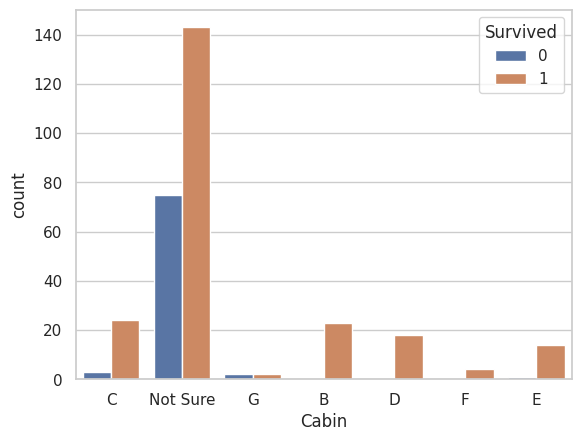

In [51]:
# Surviving dependensies from Cabin column for women
sns.countplot(data=df[df["Sex"] == "female"], x="Cabin", hue="Survived")
#It's clear that almost every person which had a Cabin survived 

In [ ]:
# lets check the distribution in surviving column for train and test
